In [67]:
df=pd.read_csv('processed-data.csv')

In [68]:
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [70]:
df.shape

(316800, 19)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

In [72]:
df.isnull().sum()

Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
dtype: int64

In [73]:
df.isnull().sum().sum()

0

In [74]:
target = 'Difficulty-in-Breathing'
X = df.drop(target , axis= 1)
y= df[target]

In [75]:
X

,Tiredness,Dry-Cough,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316796,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316797,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316798,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [76]:
y

0         1
1         1
2         1
3         1
4         1
         ..
316795    0
316796    0
316797    0
316798    0
316799    0
Name: Difficulty-in-Breathing, Length: 316800, dtype: int64

In [77]:
# split x and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [78]:
# import the model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
#fit the model with data
logreg.fit(x_train, y_train)

LogisticRegression()

In [80]:
y_pred = logreg.predict(x_test)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67     39454
           1       0.67      0.75      0.71     39746

    accuracy                           0.69     79200
   macro avg       0.69      0.69      0.69     79200
weighted avg       0.69      0.69      0.69     79200



In [82]:
# Use score method to get accuracy of model
score = logreg.score(x_test, y_test)
print(score)

0.6871085858585858


In [83]:
X

,Tiredness,Dry-Cough,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316796,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316797,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316798,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [87]:
input_data = (1,1,1,0,1,1,1,1,0,1,0,0,0,1,1,1,1,1) 
# change the input data to a numpy array 
input_data_as_numpy_array= np.asarray(input_data) 
# reshape the numpy array as we are predicting for only on instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 
prediction = logreg.predict(input_data_reshaped) 
print(prediction) 
if (prediction[0]== 0): 
    print('The Person does not have Asthma') 
else: print('The Person has Asthma')

[1]
The Person has Asthma


/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [88]:
import pickle

In [89]:
filename = 'asthma.sav' 
pickle.dump(logreg, open(filename, 'wb')) 

In [14]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1 , 1))

In [15]:
print(f'The shape of X is {X.shape}')
print(f'The shape of y is {y.shape}')

The shape of X is (316800, 18)
The shape of y is (316800, 1)


In [16]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 42)

print(f'the shape of X train is {X_train.shape}')
print(f'the shape of y train is {y_train.shape}')
print(f'the shape of X test is {X_test.shape}')
print(f'the shape of y test is {y_test.shape}')

the shape of X train is (253440, 18)
the shape of y train is (253440, 1)
the shape of X test is (63360, 18)
the shape of y test is (63360, 1)


In [17]:
from sklearn.metrics import mean_absolute_error
y_mean = y_train.mean()
y_pred_baseline= [y_mean] * len(y_train)
print("Mean apt price:", y_mean)

print("Baseline MAE:",mean_absolute_error(y_train,y_pred_baseline))

Mean apt price: 0.5000710227272728
Baseline MAE: 0.49999998991154443


In [18]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=18))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train , y_train , epochs = 10 , validation_split= 0.2)

Epoch 1/10
6336/6336 [==============================] - 23s 3ms/step - loss: 0.1707 - mean_absolute_error: 0.3427 - val_loss: 0.1586 - val_mean_absolute_error: 0.3230
Epoch 2/10
6336/6336 [==============================] - 19s 3ms/step - loss: 0.1574 - mean_absolute_error: 0.3219 - val_loss: 0.1603 - val_mean_absolute_error: 0.3334
Epoch 3/10
6336/6336 [==============================] - 20s 3ms/step - loss: 0.1570 - mean_absolute_error: 0.3204 - val_loss: 0.1589 - val_mean_absolute_error: 0.3283
Epoch 4/10
6336/6336 [==============================] - 21s 3ms/step - loss: 0.1570 - mean_absolute_error: 0.3201 - val_loss: 0.1579 - val_mean_absolute_error: 0.3247
Epoch 5/10
6336/6336 [==============================] - 20s 3ms/step - loss: 0.1569 - mean_absolute_error: 0.3196 - val_loss: 0.1580 - val_mean_absolute_error: 0.3227
Epoch 6/10
6336/6336 [==============================] - 20s 3ms/step - loss: 0.1568 - mean_absolute_error: 0.3187 - val_loss: 0.1573 - val_mean_absolute_error: 0.317

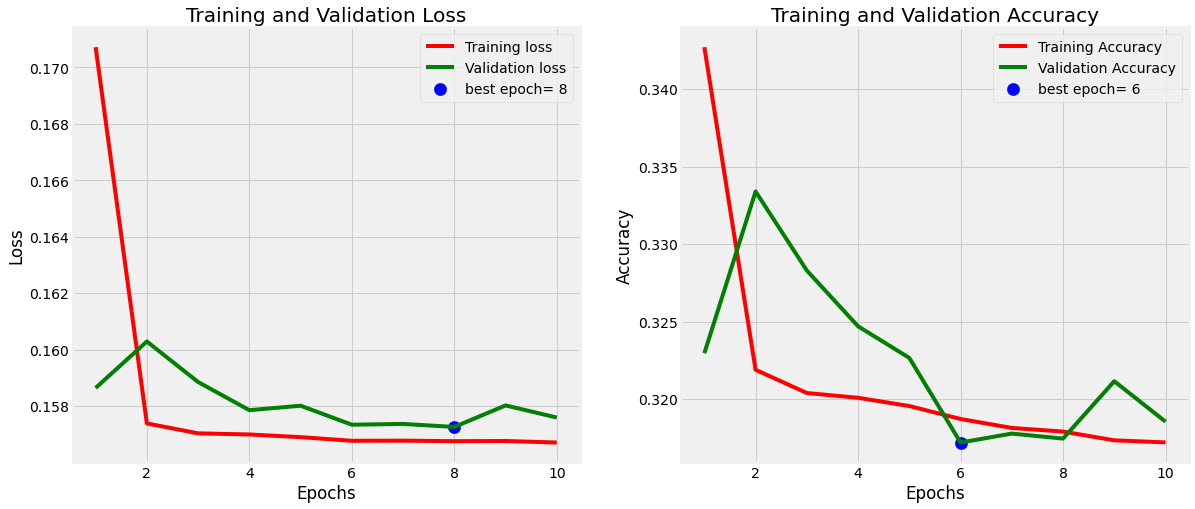

In [20]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [21]:
y_pred = model.predict(X_test)

1980/1980 [==============================] - 4s 2ms/step


In [22]:
from sklearn.metrics import r2_score

In [23]:
test_acc = r2_score(y_test , y_pred)
print(f'R2 Score = {test_acc}')

R2 Score = 0.37413368858430507


In [62]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[24739, 14715],
       [10066, 29680]])

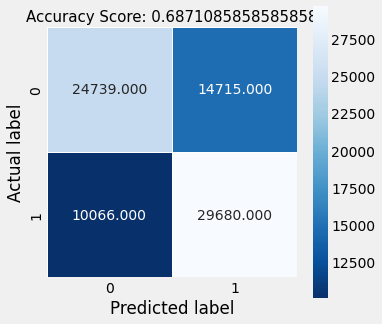

In [64]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [65]:
X_test

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.]])

In [ ]:
input_data = (0,59,0,0,1,3,0,96.26,23.3,1) 
# change the input data to a numpy array 
input_data_as_numpy_array= np.asarray(input_data) 
# reshape the numpy array as we are predicting for only on instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 
prediction = logreg.predict(input_data_reshaped) 
print(prediction) 
if (prediction[0]== 0): 
    print('The Person does not have a Brain Stroke') 
else: print('The Person has Brain Stroke')

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense #sparse or dense
from keras.layers import LeakyReLU,PReLU,ELU # activation functions


# intialize the empty artifical neural network without inputs and outputs
classifier=Sequential()


# adding the input layer and the first hidden layer
classifier.add(Dense(units =4, kernel_initializer = 'he_uniform',activation='relu',input_dim = 18)) #units are output dimension(neurons),keral_intializers are weight intilalization Technqiues



# adding the second input layer and the first hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'he_uniform',activation='relu')) # for relu u can use he_uniform, he_normal


# adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation="relu")) # for sigmoid we have to use weight intialzers as a glorot



# relu actiavtion function will be used in output layers if your ouptut is binary classification


#compling the ANN
classifier.compile(optimizer='Adamax',loss="binary_crossentropy",metrics=["mae"])

In [25]:
annhistory=classifier.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=5)

Epoch 1/5
16981/16981 [==============================] - 67s 4ms/step - loss: 1.5122 - mae: 0.4801 - val_loss: 0.6111 - val_mae: 0.3901
Epoch 2/5
16981/16981 [==============================] - 62s 4ms/step - loss: 0.4962 - mae: 0.3427 - val_loss: 0.4526 - val_mae: 0.3250
Epoch 3/5
16981/16981 [==============================] - 61s 4ms/step - loss: 0.4371 - mae: 0.3306 - val_loss: 0.4365 - val_mae: 0.3336
Epoch 4/5
16981/16981 [==============================] - 61s 4ms/step - loss: 0.4339 - mae: 0.3294 - val_loss: 0.4359 - val_mae: 0.3245
Epoch 5/5
16981/16981 [==============================] - 61s 4ms/step - loss: 0.4336 - mae: 0.3269 - val_loss: 0.4359 - val_mae: 0.3249


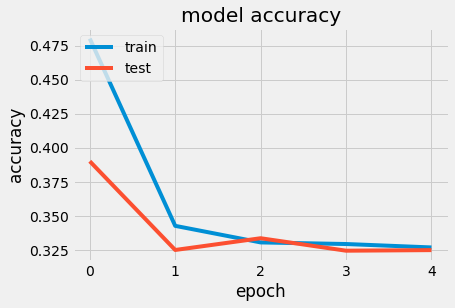

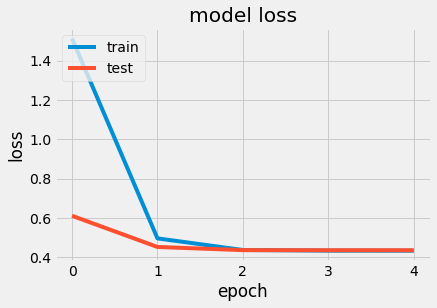

In [26]:
plt.plot(annhistory.history['mae'])
plt.plot(annhistory.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(annhistory.history['loss'])
plt.plot(annhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
input_data = (0,59,0,0,1,3,0,96.26,23.3,1)
import numpy as np

# Assuming arr is your input array
arr = np.array([0,59,0,0,1,3,0,96.26,23.3,1])  # You should adjust this array based on the number of features in your model

# Reshape the array to match the input shape expected by the model
arr = arr.reshape(1, -1)

# Scale the input array using the same scaler you used during training
arr_scaled = scaler.fit_transform(arr)

# Make predictions
prediction = classifier.predict(arr_scaled)
print(prediction)

ValueError: in user code:

    File "/home/user/.local/lib/python3.8/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/home/user/.local/lib/python3.8/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/user/.local/lib/python3.8/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/home/user/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/home/user/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/user/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 18), found shape=(None, 10)
